#  <span style ='color: blue'>ELECTRIC CAR DATA ANALYSIS</span>

### CONTEXT

The data describes various electric car models with features like acceleration, range, and price. We want to analyze this data to see what features are most important to potential buyers (e.g., long range, fast charging, affordability). This will help both consumers make informed choices and manufacturers understand what electric car features to prioritize.

### OBJECTIVE

The main objective of analyzing this electric car data is to understand what features are most important to potential buyers when choosing an electric car. This will be achieved by:
- Identifying key factors influencing purchase decisions (e.g., range, price, performance).
- Comparing various electric car models based on these factors.

### <span style ='color: RED'>PROBLEM STATEMENT</span>

**Problem Statement:** 
Analyze factors influencing electric car selection for potential buyers.

###  <span style ='color: blue'>IMPORT LIBRARIES</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###   <span style ='color: blue'>LOAD DATASET</span>

In [2]:
df=pd.read_csv("ElectricCarData.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


#### INFORMATION ABOUT DATASET

The dataset provided contains information about different electric vehicles. Here's a breakdown of the columns:

- **Brand:** The brand or manufacturer of the electric vehicle.
- **Model:** The model name of the electric vehicle.
- **AccelSec:** Acceleration time from 0 to 100 km/h in seconds.
- **TopSpeed_KmH:** Top speed of the vehicle in kilometers per hour.
- **Range_Km:** The range the vehicle can travel on a single charge in kilometers.
- **Efficiency_WhKm:** Energy efficiency of the vehicle measured in watt-hours per kilometer.
- **FastCharge_KmH:** Fast charging speed in kilometers per hour.
- **RapidCharge:** Indicates if the vehicle supports rapid charging or not.
- **PowerTrain:** Type of powertrain used in the vehicle.( transmits power from the engine to the wheels)
- **PlugType:** The type of plug used for charging.
- **BodyStyle:** The body style of the vehicle (e.g., sedan, hatchback).
- **Segment:** Segment of the vehicle in terms of size or market positioning.
- **Seats**: Number of seats in the vehicle.
- **PriceEuro:** Price of the vehicle in Euros.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


### CHECK NULL VALUES

In [71]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

### CHECK DUPLICATED VALUES

In [72]:
df[df.duplicated()].count()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

### CHECK OUTLIERS

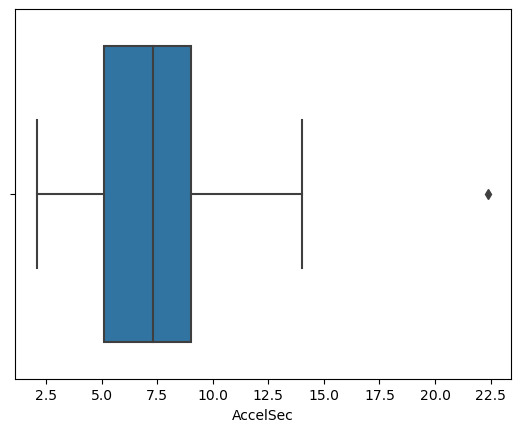

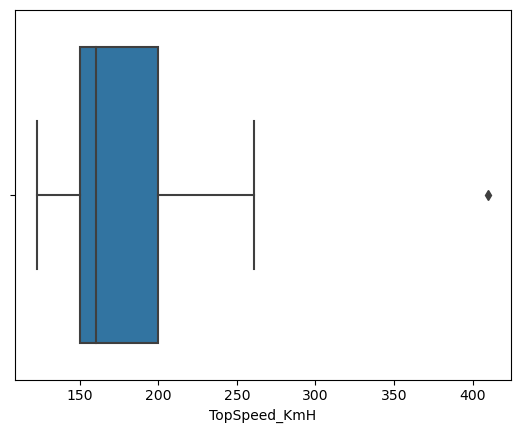

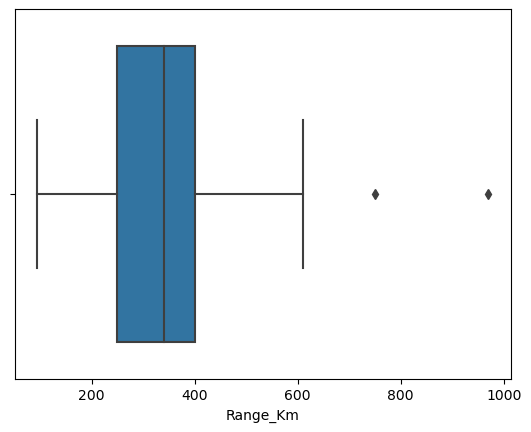

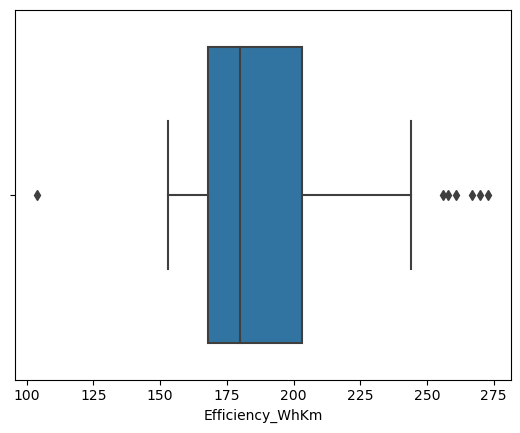

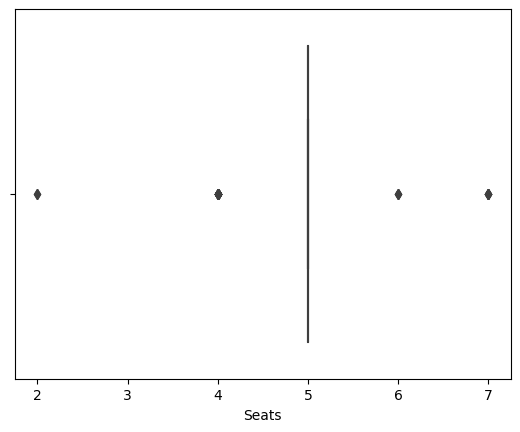

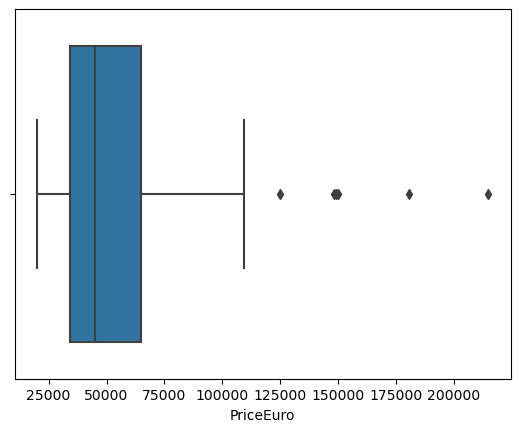

In [73]:
for i in df.select_dtypes(['int','float']):
    sns.boxplot(data=df,x=i)
    plt.show()

#### OUTLIERS TREATMENT

In [3]:
def outliers_treatment(col):
     Q1=df[col].quantile(0.25)
     Q3=df[col].quantile(0.75)
     IQR= Q3 - Q1
     UB=Q3+1.5*IQR
     LB=Q1-1.5*IQR
     Upper_Outlier=df[col]>UB
     Lower_Outlier=df[col]<LB
     df.loc[Upper_Outlier,col]=df[col].median()
     df.loc[Lower_Outlier,col]=df[col].median()

In [4]:
for i in df.select_dtypes(['int','float']):
 outliers_treatment(i)

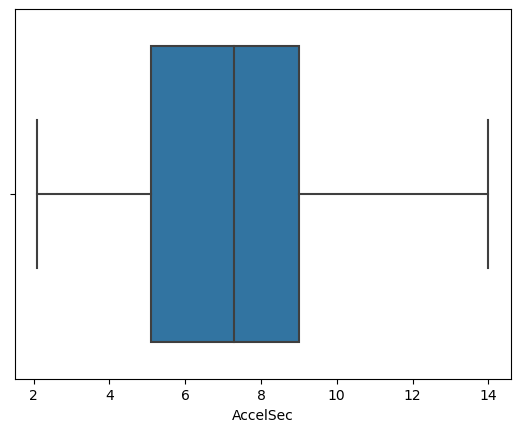

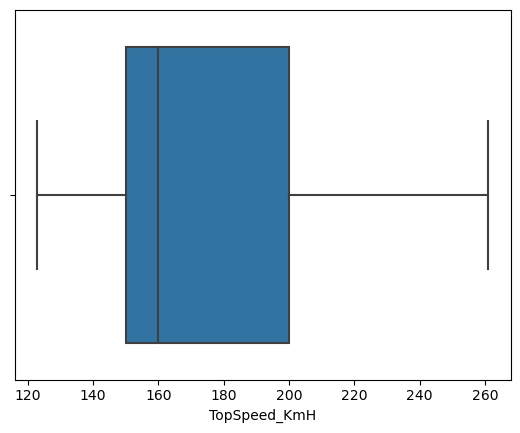

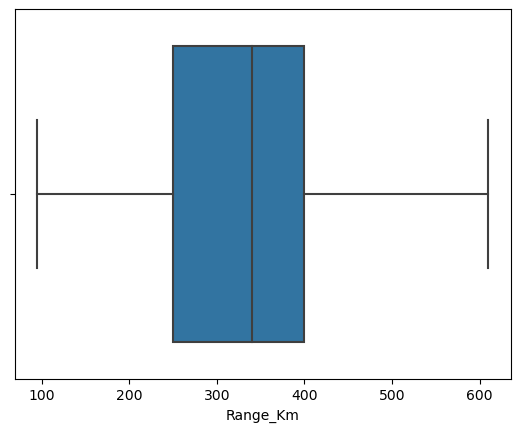

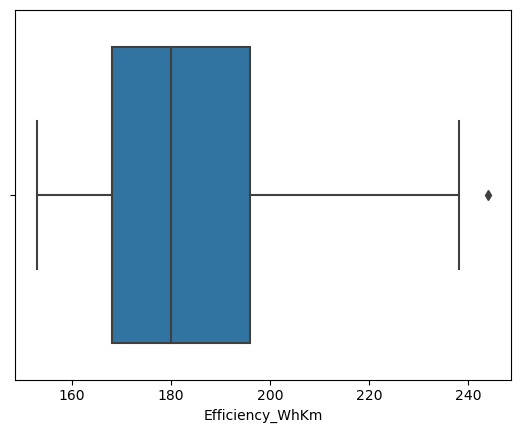

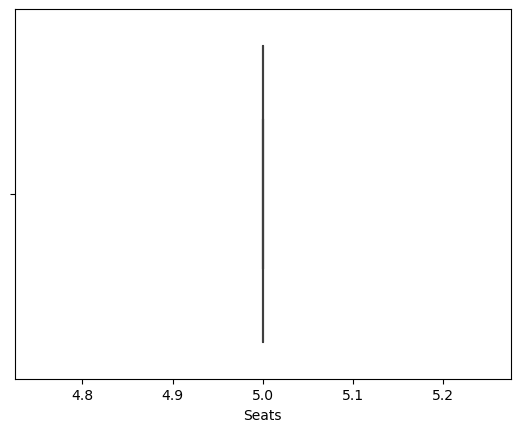

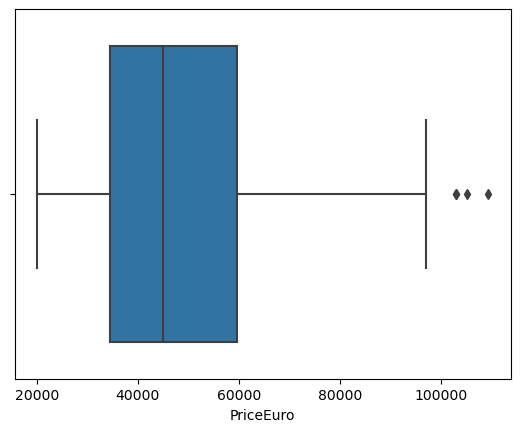

In [5]:
for i in df.select_dtypes(['int','float']):
     sns.boxplot(data=df,x=i)
     plt.show()

###   <span style ='color: blue'>Visualisation</span>

##### The most number of manufacturing vehicles

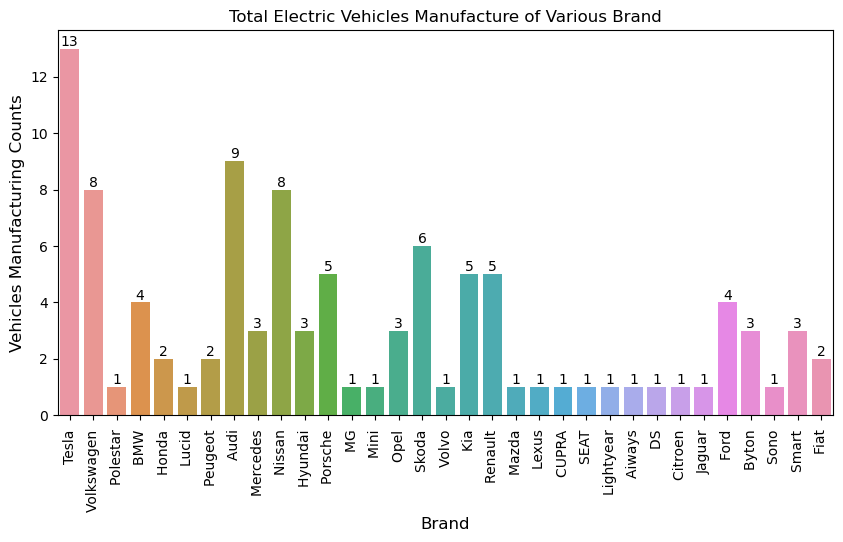

In [7]:
plt.figure(figsize=(10,5))
S=sns.countplot(data=df,x="Brand")
for v in S.containers:
    S.bar_label(v)
plt.title("Total Electric Vehicles Manufacture of Various Brand", size=12)
plt.xlabel("Brand", size=12)
plt.ylabel("Vehicles Manufacturing Counts", size=12)
plt.xticks(rotation=90)
plt.show()

**Observation:**

The chart shows the number of cars sold of different brands according to the dataset. It seems to be a bar chart with brand names on the x-axis and the number of cars model manufacturing on the y-axis.
- Tesla has 13 models which is the highest quantity of vehicles.
- Audi is in the second position, with around 9 cars model manufacture.
- Volkswagem, Nissan and Skoda follow closely behind with around 8, 8 and 6 cars manufacture respectively.
- The number of cars model manufacture by other brands including Lucid, Peugeot, Ford, etc. are all fewer than 5.

### Rapid charge

In [115]:
df["RapidCharge"].value_counts()

RapidCharge
Yes    98
No      5
Name: count, dtype: int64

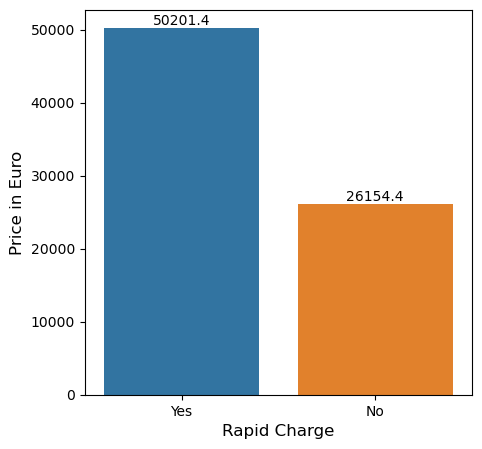

In [8]:
plt.figure(figsize=(5,5))
p=sns.barplot(data=df, x= "RapidCharge", y="PriceEuro", ci=False)
for v in p.containers:
    p.bar_label(v)
plt.xlabel("Rapid Charge", size=12)
plt.ylabel("Price in Euro", size=12)
plt.show()

**Observation:**
- graph shows the average price in Euros in Europe according to whether it has rapid charge or not. The y-axis shows the price in Euros and the x-axis shows rapid charge capability. There are two data points represented by bars. The blue bar on the left is labeled "No" for rapid charge and shows an average price of 26,154.4 Euros. The orange bar on the right is labeled "Yes" for rapid charge and shows an average price of 50,201.4 Euros.

### Model Vehicles Acceleration

In [10]:
A=df.groupby((["Brand", "Model"]), as_index=False)["AccelSec"].max().sort_values(by="AccelSec", ascending=False).head(5)
A

,Brand,Model,AccelSec
52,Nissan,e-NV200 Evalia,14.0
76,Smart,EQ forfour,12.7
65,Renault,Twingo ZE,12.6
70,Skoda,CITIGOe iV,12.3
69,SEAT,Mii Electric,12.3


<Figure size 1000x500 with 0 Axes>

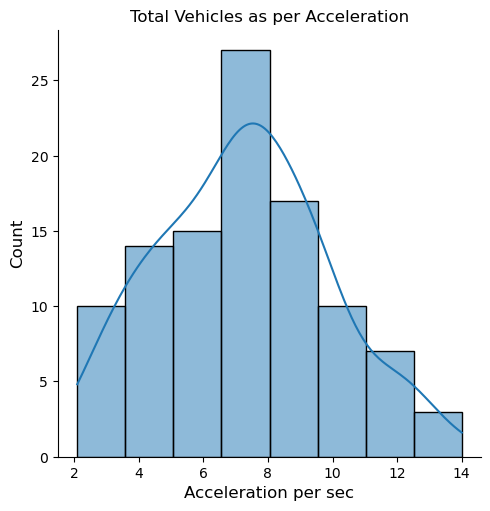

In [9]:
plt.figure(figsize=(10,5))
sns.displot(data=df, x="AccelSec", kde=True)
plt.title("Total Vehicles as per Acceleration", size=12)
plt.xlabel("Acceleration per sec", size=12)
plt.ylabel("Count", size=12)
plt.show()

**OBJECTIVES:**
- Graph shows, The maximum range of cars as per acceleration is 6 to 8 per second.
- The count of manufacturing cars as per Acceleration per second incresing range from 2 to 8, after that decline the manufacturing cars range as highest acceleration per second.

### Model vehicles efficiency

In [88]:
B=df.groupby((["Brand", "Model"]), as_index=False)["Efficiency_WhKm"].max().sort_values(by="Efficiency_WhKm", ascending=False).head(5)
B

,Brand,Model,Efficiency_WhKm
16,Byton,M-Byte 95 kWh 4WD,244
15,Byton,M-Byte 95 kWh 2WD,238
4,Audi,e-tron 55 quattro,237
31,Jaguar,I-Pace,232
49,Nissan,Ariya e-4ORCE 87kWh Performance,232


<Figure size 1000x500 with 0 Axes>

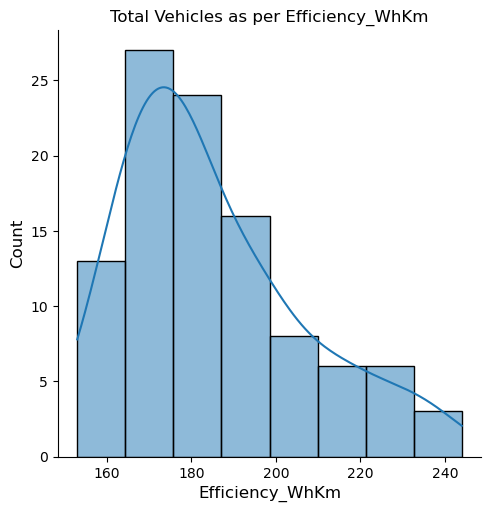

In [12]:
plt.figure(figsize=(10,5))
sns.displot(data=df, x="Efficiency_WhKm",kde=True)
plt.title("Total Vehicles as per Efficiency_WhKm", size=12)
plt.xlabel("Efficiency_WhKm", size=12)
plt.ylabel("Count", size=12)
plt.show()

**OBJECTIVES:**
- Graph shows, car has the highest efficiency range from 150whkm to 175 whkm. afterthat, decline the graph of counts of cars as per highest efficiency range 180 onwards.

### Relationship Range, Power Train and Top Speed

<Figure size 500x500 with 0 Axes>

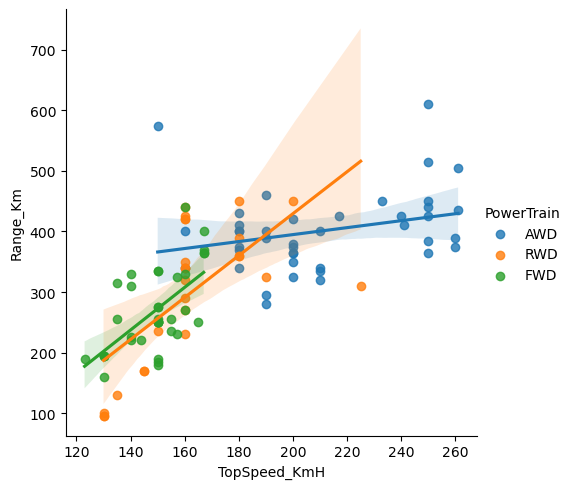

In [97]:
plt.figure(figsize=(5,5))
sns.lmplot(data=df,x="TopSpeed_KmH", y="Range_Km",hue="PowerTrain")
plt.title("Total Vehicles as per Efficiency_WhKm", size=12)
plt.xlabel("TopSpeed_KmH", size=12)
plt.ylabel("Range_Km", size=12)
plt.show()

**Observation:**
-  it appears to show a negative correlation between the top speed (TopSpeed_KmH) and the range (Range_Km) of a powertrain. This means that as the top speed of a powertrain increases, the range tends to decrease.

### Car Price Depend on Top Speed

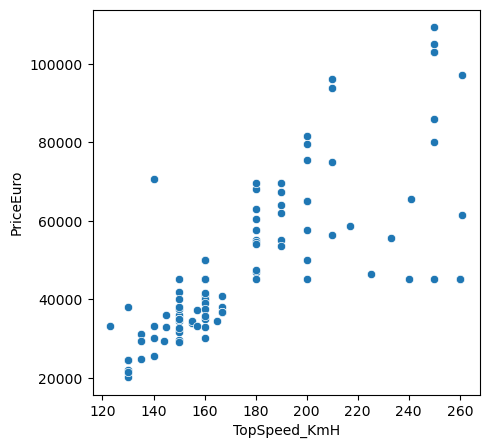

In [120]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x="TopSpeed_KmH", y="PriceEuro")
plt.show()

**Observation:**
- As per the graph shows, The top speed range from 120kmhr to 170kmhr maximum cars is available.
- As per top speed increase there car price in Euro also increase, but car model is specific.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


#### LABEL ENCODING

In [193]:
from sklearn.preprocessing import LabelEncoder

In [194]:
LE=LabelEncoder()
LE

LabelEncoder()

In [195]:
def HCD(col):
 df[col]=LE.fit_transform(df[col])

In [196]:
for i in df.select_dtypes(include=['object',"int"]):
 HCD(i)

In [197]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,18,42,5,50,1,0,2,7,3,2,52
1,31,33,10.0,9,15,9,7,1,2,2,1,2,2,11
2,23,0,4.7,15,35,21,36,1,0,2,2,3,2,53
3,2,101,6.8,12,28,32,32,1,2,2,6,3,2,64
4,9,78,9.5,5,4,10,2,1,2,2,1,1,1,16


#### CO-RELATION

In [198]:
df.corr()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Brand,1.000000,-0.401572,0.062730,0.021076,0.060537,-0.221659,0.100688,-0.188137,0.056464,-0.231104,-0.275860,-0.002040,0.122233,-0.190202
Model,-0.401572,1.000000,-0.050635,0.057176,-0.077762,0.022491,0.005442,0.144293,-0.007609,0.023750,0.261255,0.068414,-0.049640,0.111227
AccelSec,0.062730,-0.050635,1.000000,-0.865154,-0.719853,-0.410615,-0.759025,-0.514820,0.521011,-0.259657,-0.347164,-0.451568,-0.151456,-0.744832
TopSpeed_KmH,0.021076,0.057176,-0.865154,1.000000,0.756068,0.444486,0.817411,0.349092,-0.567529,0.054147,0.477244,0.650718,0.189824,0.843350
Range_Km,0.060537,-0.077762,-0.719853,0.756068,1.000000,0.424530,0.821237,0.411901,-0.467350,0.104279,0.351384,0.595759,0.335400,0.768121
Efficiency_WhKm,-0.221659,0.022491,-0.410615,0.444486,0.424530,1.000000,0.405366,0.116273,-0.447413,-0.060855,0.433367,0.679746,0.302620,0.665857
FastCharge_KmH,0.100688,0.005442,-0.759025,0.817411,0.821237,0.405366,1.000000,0.331404,-0.458178,0.126715,0.397805,0.616686,0.201503,0.762814
RapidCharge,-0.188137,0.144293,-0.514820,0.349092,0.411901,0.116273,0.331404,1.000000,-0.274797,0.539160,0.223577,0.189954,0.340828,0.306526
PowerTrain,0.056464,-0.007609,0.521011,-0.567529,-0.467350,-0.447413,-0.458178,-0.274797,1.000000,-0.039763,-0.349484,-0.497850,-0.263083,-0.617321
PlugType,-0.231104,0.023750,-0.259657,0.054147,0.104279,-0.060855,0.126715,0.539160,-0.039763,1.000000,0.066463,-0.163959,-0.095449,0.040580


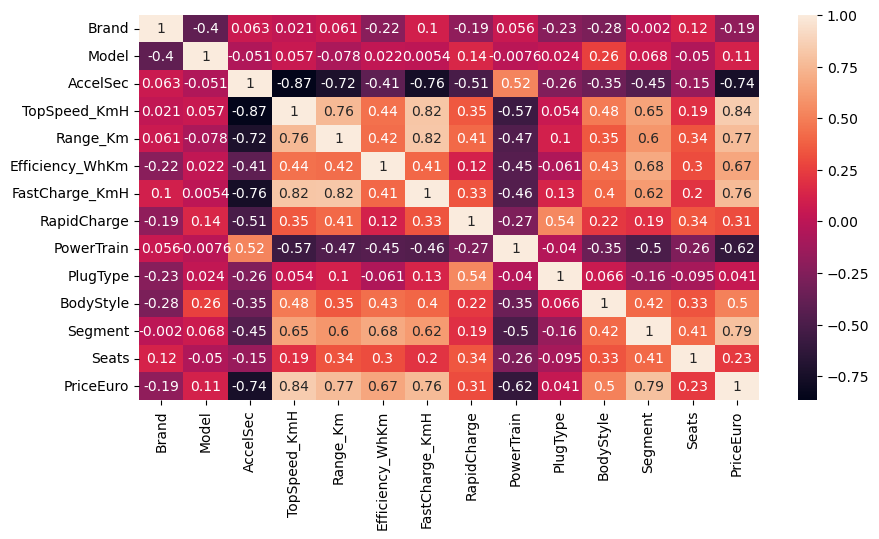

In [199]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Observation:**
- From the heatmep we can see that, there is strong correlation between **Segment** and **Bodystyle** to all columns

### Dependent and independent Variable

In [200]:
X=df.drop('PriceEuro',axis=1)
Y=df['PriceEuro']

In [201]:
from sklearn.preprocessing import PowerTransformer

In [202]:
PT=PowerTransformer()
PT

PowerTransformer()

In [203]:
X=PT.fit_transform(X)
X

array([[ 1.11024277, -0.06511924, -0.96506971, ...,  1.15201559,
         0.36515734,  0.18486151],
       [ 1.19746121, -0.51080479,  0.92748087, ..., -1.23041849,
        -0.22999352,  0.18486151],
       [ 0.48983107, -2.06550802, -0.91934626, ..., -0.81233665,
         0.36515734,  0.18486151],
       ...,
       [ 0.21776396, -1.55298084, -0.41295663, ..., -1.23041849,
        -0.22999352,  0.18486151],
       [ 0.21776396, -1.4522779 , -0.74229179, ..., -1.23041849,
        -0.22999352,  0.18486151],
       [-1.45202334, -0.19814322,  0.16754078, ...,  0.7702779 ,
         0.87108961,  0.18486151]])

### Train Test Split

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.5,random_state=30)

### <span style ='color: blue'>LINEAR REGRESSION</span>

In [206]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [207]:
LR=LinearRegression()
LR

LinearRegression()

In [208]:
LR.fit(x_train,y_train)

LinearRegression()

In [209]:
LR_pred=LR.predict(x_test)
LR_pred

array([27.7175277 , 51.25101529, 19.58713409, 47.27647883, 66.2536085 ,
       42.33891015, 43.09444291, 25.13707989, 61.16030567, 33.68281546,
       -0.35116337, 35.06446839, 32.02280499, 48.50348134, 54.31717543,
       80.64085304, 57.9128585 ,  6.39416594, 24.9826461 , 14.57478702,
       33.72393862, 71.1680449 , 29.48496478,  8.85904758, 24.63402817,
       65.65849004, 37.39169826, 58.35888921, 24.7891184 , 20.50532928,
       88.1979006 , 28.27899562, 70.86744514, 75.72880439, 80.26247197,
       40.48666207, 35.91733351, 79.487313  , 31.03574896, 26.13597733,
       62.21423845, 19.51422183, 55.83713894, 25.99863622,  6.59745495,
       29.27105457,  9.07605316, 77.42660353, 40.49357554, 68.14652828,
       35.49191289, 35.03551446])

In [210]:
LR.score(x_train,y_train)

0.9218577287049927

In [211]:
LR.score(x_test,y_test)

0.8077838525012453

In [223]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [214]:
r2_score(y_test,LR_pred)

0.8077838525012453

In [224]:
mean_squared_error(y_test,LR_pred)

111.99000402231536

In [225]:
mean_absolute_error(y_test,LR_pred)

6.86925832261604

##### Lasso

In [215]:
L1=Lasso(alpha=5)
L1

Lasso(alpha=5)

In [216]:
L1.fit(x_train,y_train)

Lasso(alpha=5)

In [217]:
L1_pred=L1.predict(x_test)
L1_pred

array([37.64115418, 52.2304644 , 27.08492498, 47.50839039, 59.67521391,
       42.73763962, 48.25712095, 30.80366664, 60.35896435, 38.75676859,
       10.96336507, 39.05825869, 34.97818233, 52.44941462, 50.89404444,
       69.99374894, 52.44887237, 13.78704112, 28.77804631, 22.50410555,
       38.75676859, 62.89037864, 32.87986962, 18.81819835, 28.77804631,
       62.27859634, 41.4752325 , 53.06606836, 32.77930101, 26.82180539,
       77.09283312, 34.16461804, 64.12687063, 70.01720835, 70.4257721 ,
       42.49539371, 33.96167023, 70.6259343 , 35.31304375, 31.95374875,
       58.40385203, 25.44633505, 52.02226692, 34.84369376, 17.85935055,
       37.23191539, 13.78704112, 66.48407759, 41.7386019 , 60.04915878,
       40.92947394, 42.73763962])

In [218]:
L1.score(x_train,y_train)

0.8440164280502673

In [219]:
L1.score(x_test,y_test)

0.7297394737254546

In [220]:
from sklearn.metrics import r2_score

In [226]:
r2_score(y_test,L1_pred)

0.7297394737254546

##### Ridge

In [227]:
L2=Ridge(alpha=10)
L2

Ridge(alpha=10)

In [228]:
L2.fit(x_train,y_train)

Ridge(alpha=10)

In [229]:
L2_pred=L2.predict(x_test)
L2_pred

array([24.29089906, 55.55305501, 22.36916675, 50.61209234, 66.85219517,
       47.25437885, 42.41331688, 28.63634108, 62.42566025, 33.35926374,
        2.6694039 , 35.52115949, 38.18226964, 53.70673263, 50.40742583,
       75.31508684, 57.97963282,  6.90791678, 24.99133009, 17.06226909,
       33.37470879, 69.21593805, 26.37508052, 12.66281908, 24.33381809,
       62.69053013, 37.31474735, 58.05984987, 24.74900673, 17.62234515,
       82.68739696, 28.01774783, 70.62960524, 72.53282196, 76.22430741,
       39.65527271, 35.68802964, 77.10410142, 30.21606963, 29.45039659,
       60.80309853, 19.06011503, 54.93125752, 22.87870072, 10.28267111,
       29.92808621,  8.44918362, 74.83644134, 42.61821592, 64.18478645,
       32.07294782, 32.19496363])

In [230]:
L2.score(x_train,y_train)

0.9142114894771458

In [231]:
L2.score(x_test,y_test)

0.8301930198993684

In [232]:
from sklearn.metrics import r2_score

In [233]:
r2_score(y_test,L2_pred)

0.8301930198993684

###  <span style ='color: blue'>RANDOM FOREST REGRESSION</span>

In [234]:
from sklearn.ensemble import RandomForestRegressor

In [235]:
DTR=RandomForestRegressor(n_estimators=200, random_state=0)

In [236]:
DTR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [237]:
model_pred=DTR.predict(x_test)
model_pred[:5]

array([19.37 , 56.88 , 20.2  , 51.205, 65.775])

In [238]:
y_test[:5]

1     11
0     52
20     8
88    46
42    72
Name: PriceEuro, dtype: int64

In [239]:
DTR.score(x_train,y_train)

0.9787455656324582

In [240]:
DTR.score(x_test,y_test)

0.8373312883747117

In [241]:
from sklearn.metrics import r2_score

In [242]:
r2_score(y_test,model_pred)

0.8373312883747117

In [244]:
import scipy as sp

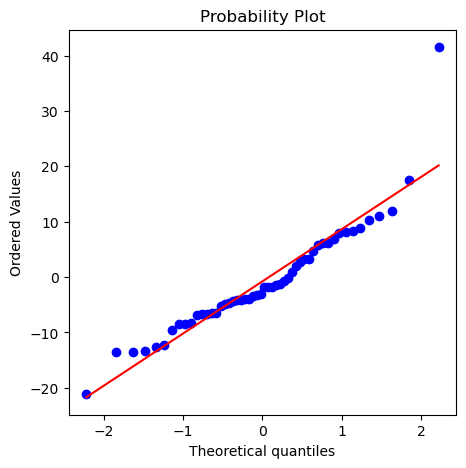

In [246]:
test_res=y_test-model_pred
fig,ax=plt.subplots(figsize=(5,5))
prediction=sp.stats.probplot(test_res,plot=ax)

- as per the graph, **Actual values** is on the **Prediction line** that is **Errors** between Actual valus and Prediction line is remove by using Random forest regression.
- Actual values is on the Prediction line, our **prediction** is **good**.

## Conclusion:

In conclusion, factors such as performance, range, charging infrastructure, and price play significant roles in influencing electric car selection for potential buyers. The decision ultimately depends on individual preferences, priorities, and budget constraints.
